In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

data = pd.read_csv('Actualizado_Personality.csv')

X = data.iloc[:, :-1].values
# selecciono la columna de salida (la última)
Y = data.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)
n = X_train.shape[0] # Número de registros de entrenamiento

In [22]:
accuracy_train_l = []
accuracy_test_l = []

def graficar_accuracy(L, train_l, test_l):
    iters = len(test_l)
    fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
    }
    fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
    }
    fig, (ax) = plt.subplots(1, 1, figsize=(8,6))
    ax.plot(train_l, label='Train', **fmt_train)
    ax.plot(test_l, label='Test', **fmt_test)

    ax.grid(which='both')
    ax.legend()
    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()
    plt.show()

In [23]:
def red_neuronal(L,iteraciones):
    # Pesos y sesgos iniciados aleatoriamente para el primer forward propagation 
    np.random.seed(10)                      #Con una semilla para reproductibilidad
    w_hidden = np.random.rand(4 ,7) * 2 - 1
    b_hidden = np.random.rand(4, 1) * 2 - 1

    w_output = np.random.rand(1, 4) * 2 - 1
    b_output = np.random.rand(1, 1) * 2 - 1

    #Funciones de activación y sus derivadas
    relu = lambda x: np.maximum(x,0) #para la capa oculta
    d_relu= lambda x: (x > 0).astype(float)

    logistic = lambda x: 1/(1 + np.exp(-x)) #para la capa de salida
    d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2
    
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        #Derivadas utilizando la regla de la cadena
        dC_dA2 = 2*A2 - 2*Y
        dA2_dZ2 = d_logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        #Derivadas del costo con respecto W2, B2, A1, W1 y B1
        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2
    
    accuracy_test_l = [] #se limpian para las nuevas iteraciones y L
    accuracy_train_l = []
    
    for i in tqdm(range(iteraciones)):
        idx = np.random.choice(n,1,replace=False)
        X_sample = X_train[idx].transpose()
        Y_sample = Y_train[idx]

        Z1, A1, Z2, A2 = forward_prop(X_sample)

        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        #actualizar pesos y sesgos

        w_hidden -= L*dW1
        b_hidden -= L*dB1
        w_output -= L*dW2
        b_output -= L*dB2

        #Calculo de precisión de entrenamiento
        

        train_predictions = forward_prop(X_train.transpose())[3]
        train_comparisons = np.equal((train_predictions >= .5).flatten().astype(int),Y_train) #comparo predicciones con reales
        train_accuracy = sum(train_comparisons.astype(int)) / X_train.shape[0]
        accuracy_train_l.append(train_accuracy)
        

        test_predictions = forward_prop(X_test.transpose())[3] #solo me importa A2 que es la capa de salida
        test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int),Y_test) #comparo predicciones con reales
        test_accuracy = sum(test_comparisons.astype(int)) / X_test.shape[0]
        accuracy_test_l.append(test_accuracy)

    graficar_accuracy(L = L, train_l= accuracy_train_l, test_l= accuracy_test_l)

100%|██████████| 500/500 [00:00<00:00, 1412.22it/s]


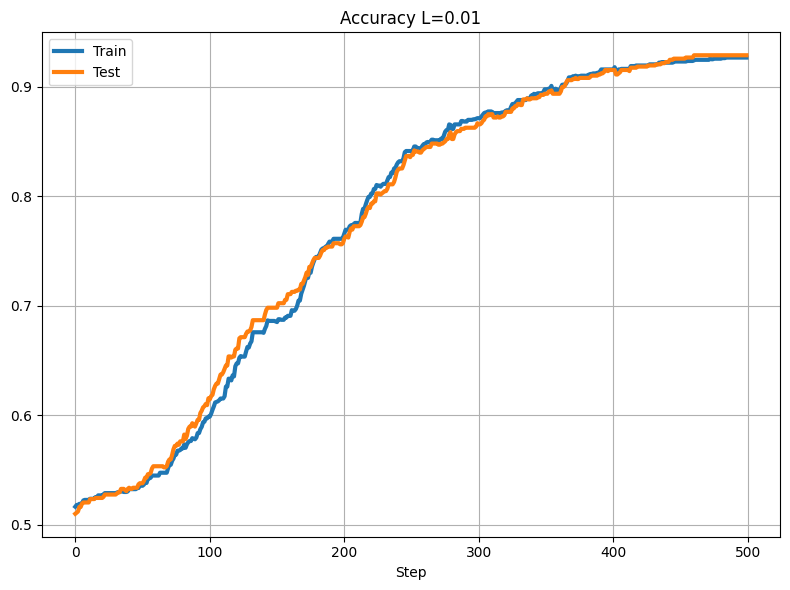

100%|██████████| 500/500 [00:00<00:00, 1681.04it/s]


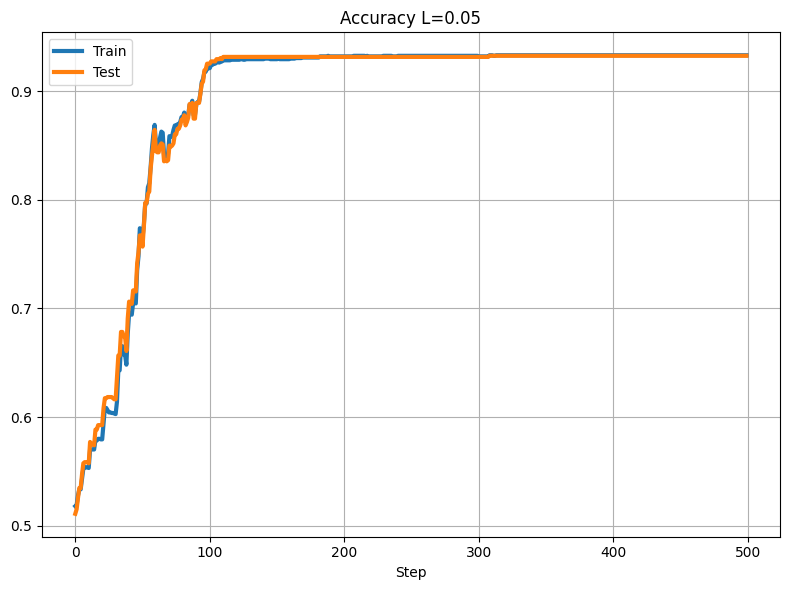

100%|██████████| 500/500 [00:00<00:00, 1843.08it/s]


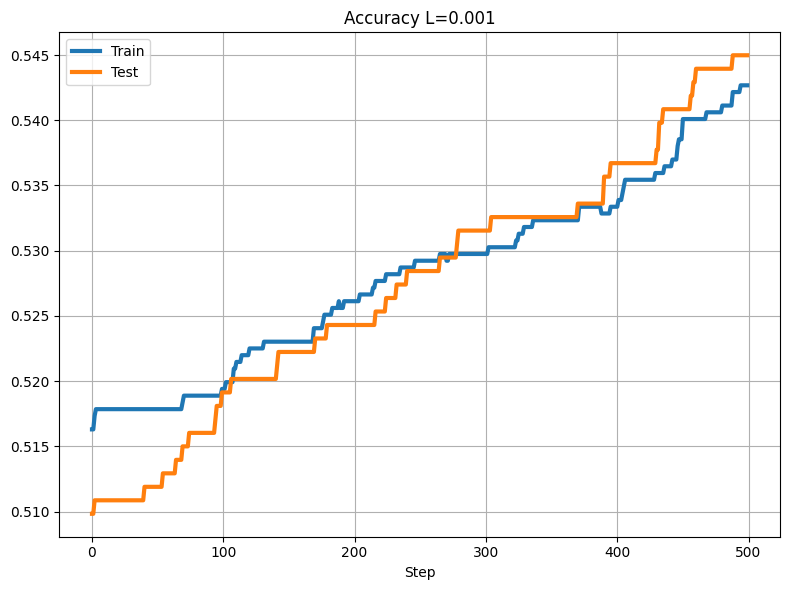

100%|██████████| 500/500 [00:00<00:00, 1943.17it/s]


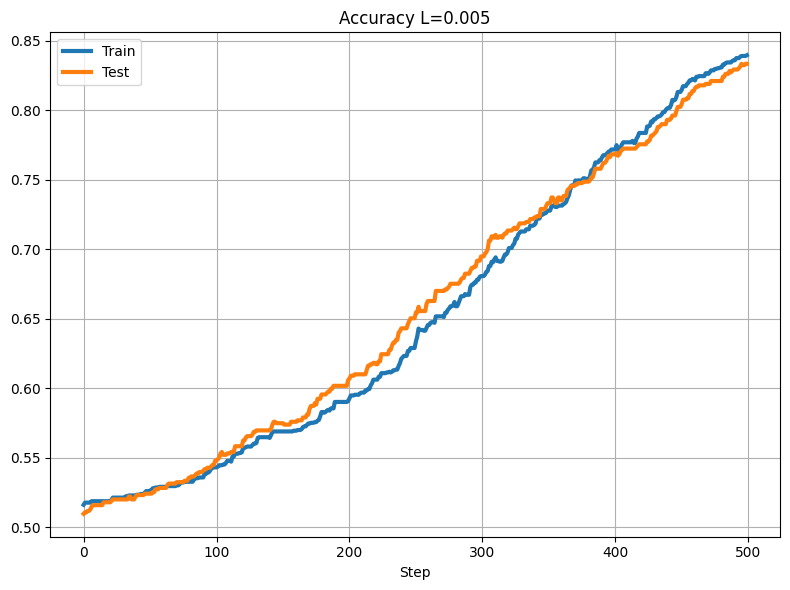

100%|██████████| 1000/1000 [00:00<00:00, 2095.40it/s]


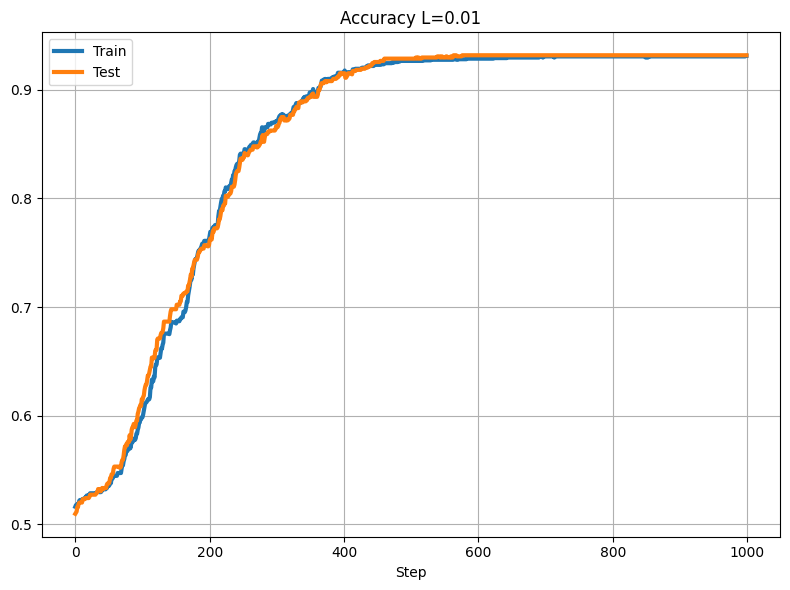

100%|██████████| 1000/1000 [00:00<00:00, 1100.88it/s]


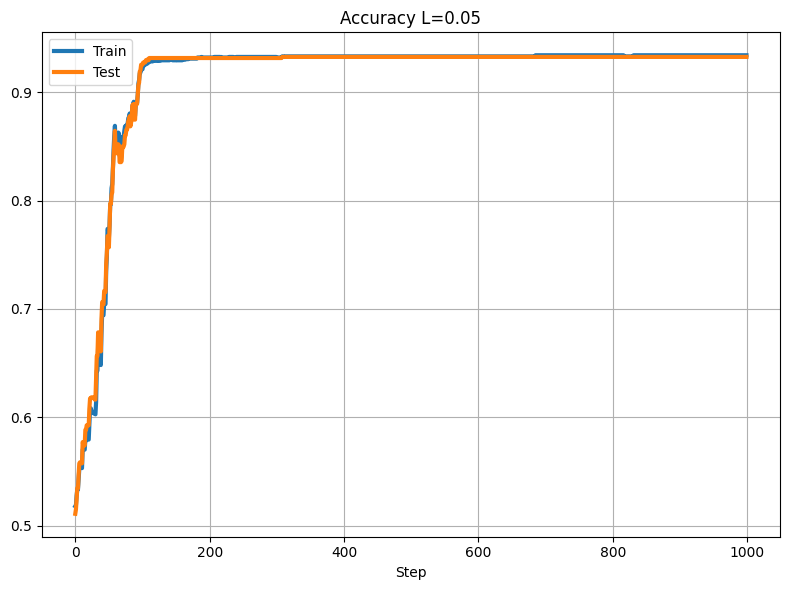

100%|██████████| 1000/1000 [00:00<00:00, 1575.27it/s]


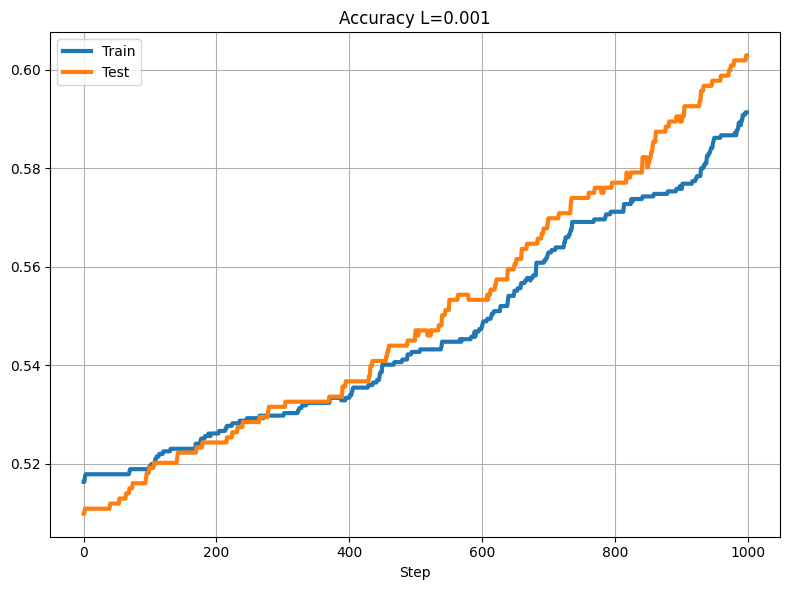

100%|██████████| 1000/1000 [00:00<00:00, 2067.24it/s]


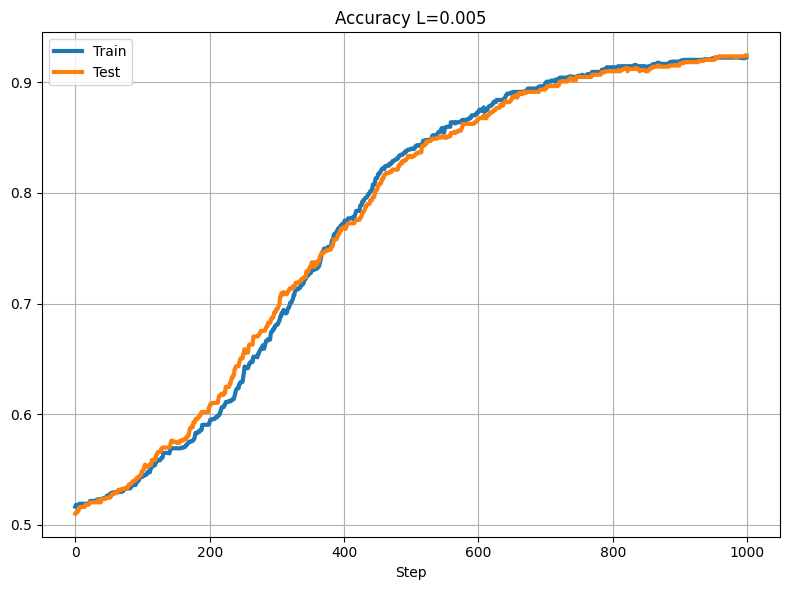

100%|██████████| 3000/3000 [00:01<00:00, 1872.49it/s]


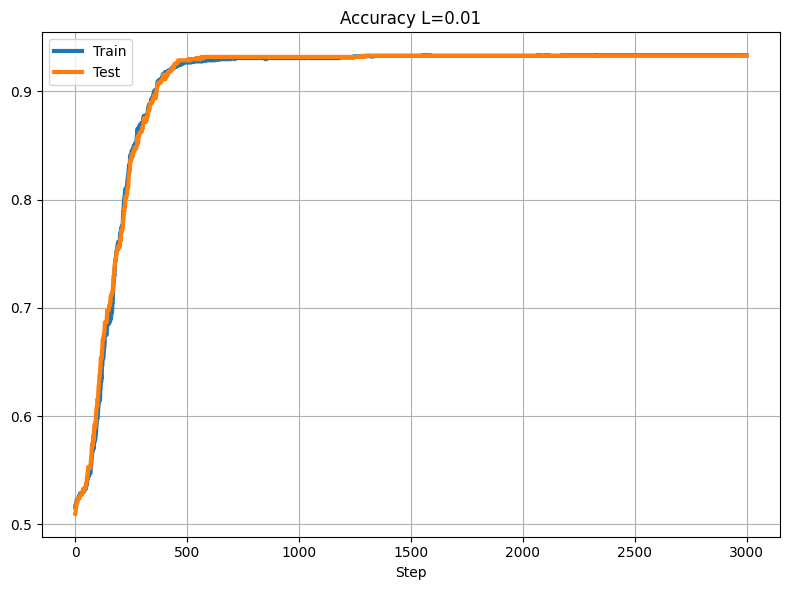

100%|██████████| 3000/3000 [00:01<00:00, 2018.93it/s]


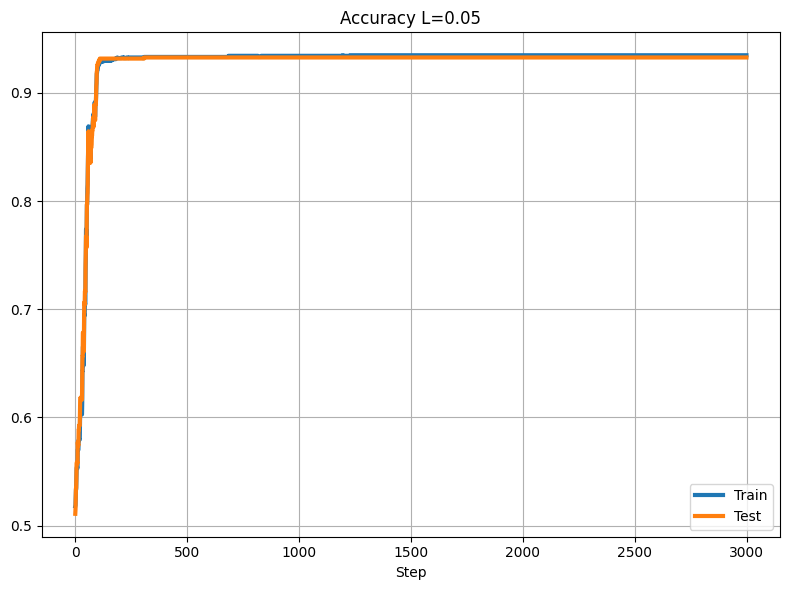

100%|██████████| 3000/3000 [00:01<00:00, 2222.17it/s]


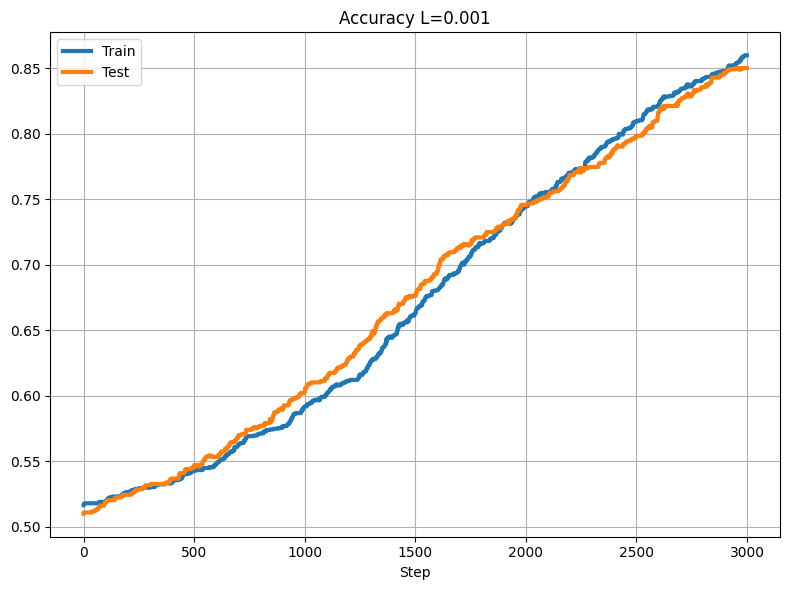

100%|██████████| 3000/3000 [00:01<00:00, 2252.43it/s]


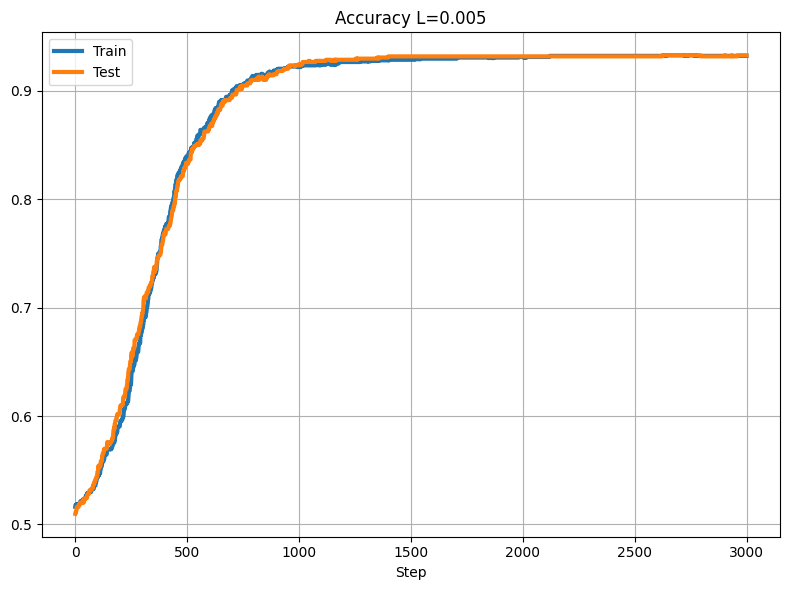

100%|██████████| 6000/6000 [00:02<00:00, 2236.89it/s]


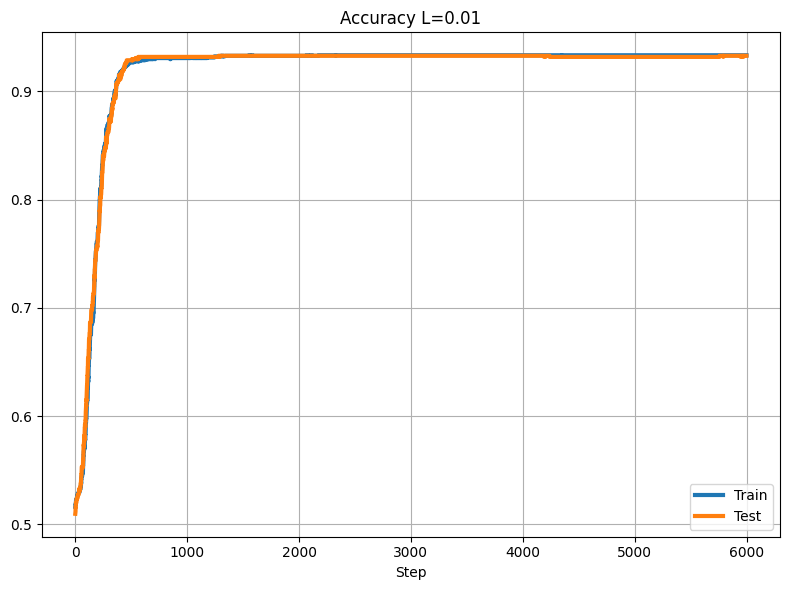

100%|██████████| 6000/6000 [00:02<00:00, 2265.30it/s]


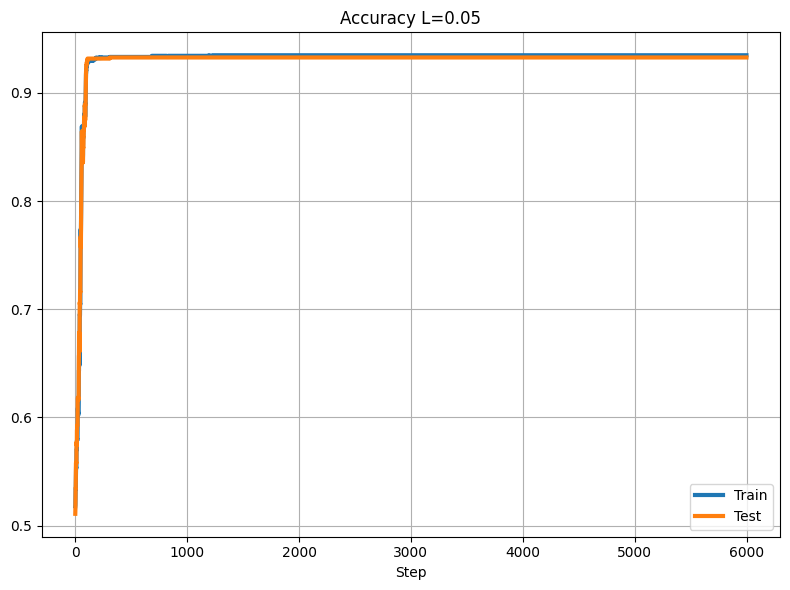

100%|██████████| 6000/6000 [00:02<00:00, 2219.74it/s]


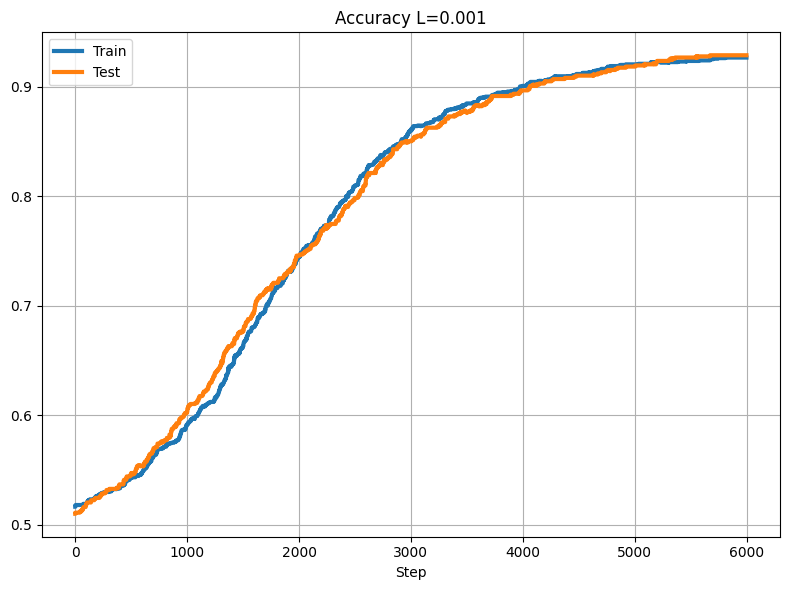

100%|██████████| 6000/6000 [00:02<00:00, 2208.14it/s]


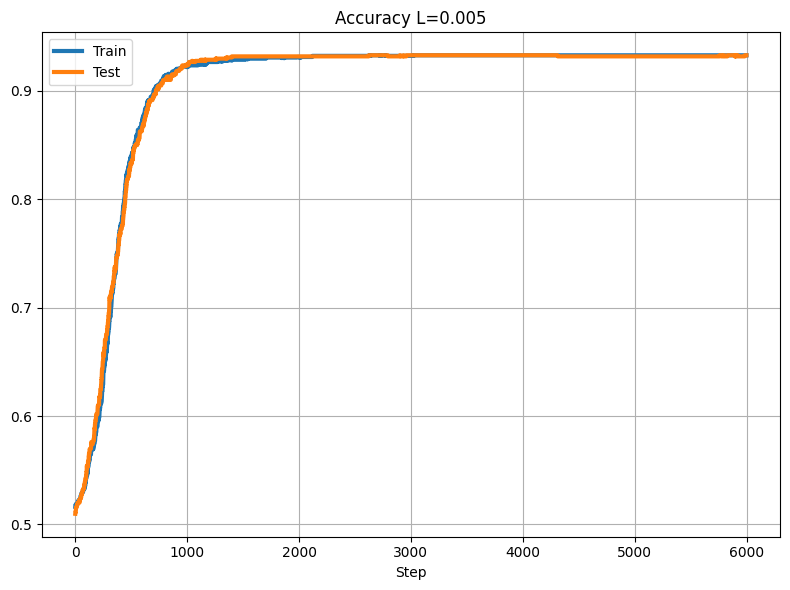

In [26]:
iters_l = (500, 1000, 3000, 6000)
L_l = (0.01, 0.05, 0.001, 0.005)

for iter in iters_l:
    for L in L_l:
        red_neuronal(L = L, iteraciones = iter)
        print()